<a href="https://colab.research.google.com/github/ArtemOsokin/psskad_mgpu_course/blob/main/PW/PW1/PW_01_Osokin_A_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1. Начало работы с API

# 1.2. GitHub API

**1.2.1.** Сгенерировать персональный токен на 7 дней на странице https://github.com/settings/tokens/new

![](https://drive.google.com/uc?export=view&id=1rNV_0jXbY4GLYAlFu-SUbOoGYWk9hKGe)





**1.2.2.**	Настройка окружения: убедитесь, что у вас установлены необходимые библиотеки: requests, pandas, matplotlib, seaborn.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.3.** Подключение к GitHub API

In [5]:
GITHUB_API_URL = "https://api.github.com"
ACCESS_TOKEN = "access_token"
headers = {
    "Authorization": f"token {ACCESS_TOKEN}"
}
REPO_OWNER = "ArtemOsokin"

**1.2.4.** Проанализировать собственные репозитории.

 Чтобы вывести список всех репозиториев пользователя с GitHub и отсортировать их по дате создания с помощью Python, можно воспользоваться библиотекой requests для взаимодействия с GitHub API.

In [6]:
import requests

def get_repositories(username):
    url = f"https://api.github.com/users/{username}/repos"
    response = requests.get(url)

    if response.status_code == 200:
        repos = response.json()
        # Сортируем репозитории по дате создания
        sorted_repos = sorted(repos, key=lambda x: x['created_at'], reverse=True)
        for repo in sorted_repos:
            print(f"Repository: {repo['name']}, Created at: {repo['created_at']}")
    else:
        print(f"Error: Unable to fetch repositories for user {username} (Status code: {response.status_code})")

# Замените 'your-username' на имя пользователя GitHub, чей список репозиториев нужно вывести
get_repositories(REPO_OWNER)

Repository: psskad_mgpu_course, Created at: 2024-09-11T16:01:17Z
Repository: BDP-MGPU-Course, Created at: 2024-04-06T09:44:34Z
Repository: DEP-MGPU-Course, Created at: 2024-02-14T18:30:40Z
Repository: meeting_room_booking_system, Created at: 2024-02-03T09:06:30Z
Repository: mgpu_python_for_data_analysis, Created at: 2023-09-12T17:39:19Z
Repository: excelParser, Created at: 2023-04-20T10:00:54Z
Repository: bot_for_fun, Created at: 2023-04-05T13:29:10Z
Repository: car_order_management, Created at: 2022-10-11T16:41:54Z
Repository: test_mission_VPS, Created at: 2022-10-09T08:57:06Z
Repository: notifications_service, Created at: 2022-04-27T06:45:42Z
Repository: UGC-service, Created at: 2022-03-28T19:30:01Z
Repository: ETL, Created at: 2022-01-15T14:08:42Z
Repository: Admin_panel_sprint_2, Created at: 2021-12-13T06:54:40Z


**1.2.5.**	Получение данных репозитория

In [10]:
repo = "bot_for_fun"
response = requests.get(f"{GITHUB_API_URL}/repos/{REPO_OWNER}/{repo}/commits", headers=headers)
data = response.json()
data

[{'sha': '3ae7d5d76c7a31a9dbd0946829b20f5517ed7d1d',
  'node_id': 'C_kwDOJTERZ9oAKDNhZTdkNWQ3NmM3YTMxYTlkYmQwOTQ2ODI5YjIwZjU1MTdlZDdkMWQ',
  'commit': {'author': {'name': 'Osokin.Art',
    'email': '44673312+ArtemOsokin@users.noreply.github.com',
    'date': '2024-06-02T18:25:18Z'},
   'committer': {'name': 'GitHub',
    'email': 'noreply@github.com',
    'date': '2024-06-02T18:25:18Z'},
   'message': 'Merge pull request #9 from ArtemOsokin/feature/update_aiogram\n\nupdate',
   'tree': {'sha': 'f7f2fd7802572870d769668587eea5eaf8e79b44',
    'url': 'https://api.github.com/repos/ArtemOsokin/bot_for_fun/git/trees/f7f2fd7802572870d769668587eea5eaf8e79b44'},
   'url': 'https://api.github.com/repos/ArtemOsokin/bot_for_fun/git/commits/3ae7d5d76c7a31a9dbd0946829b20f5517ed7d1d',
   'comment_count': 0,
   'verification': {'verified': True,
    'reason': 'valid',
    'signature': '-----BEGIN PGP SIGNATURE-----\n\nwsFcBAABCAAQBQJmXLkOCRC1aQ7uu5UhlAAA+28QACistVYLCjgebTzdsncuf26p\n5h2qN1LjmI3Ye8CbtY

**1.2.6** Подготовка Датафрейма с данными

In [11]:
data = {
    'date': [commit['commit']['committer']['date'] for commit in data],
    'message': [commit['commit']['message'] for commit in data]
}
df = pd.DataFrame(data)
df

,date,message
0,2024-06-02T18:25:18Z,Merge pull request #9 from ArtemOsokin/feature...
1,2024-06-02T18:20:21Z,update
2,2023-06-21T10:21:52Z,bugfix
3,2023-06-21T07:35:58Z,Merge pull request #8 from ArtemOsokin/develop...
4,2023-06-21T07:33:21Z,Merge pull request #7 from ArtemOsokin/feature...
5,2023-06-21T07:30:10Z,update debug settings
6,2023-06-21T07:15:52Z,update check_users handler
7,2023-06-21T07:05:39Z,Added Increment count_gpt_requests for users
8,2023-06-20T10:05:24Z,Merge pull request #6 from ArtemOsokin/develop...
9,2023-06-20T10:03:48Z,Merge pull request #5 from ArtemOsokin/bugfix/...


**1.2.6.** Визуализация данных: постройте графики для визуализации активности репозиториев.

Анализ активности по дням

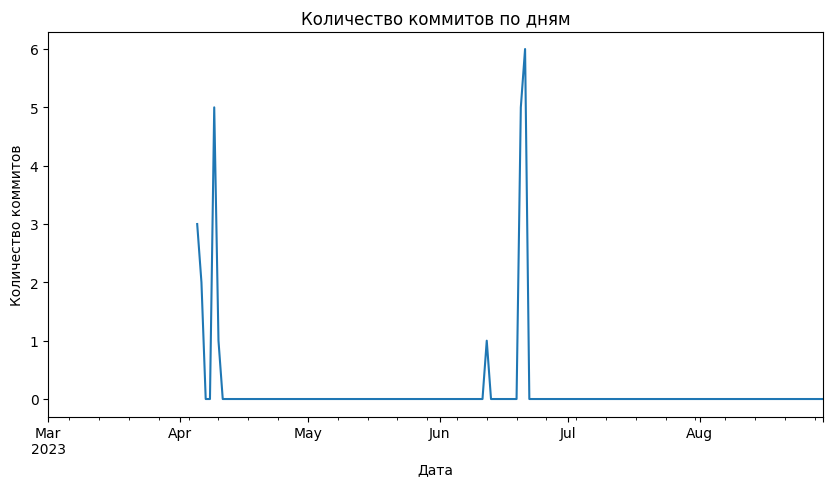

In [29]:
daily_commits = df.resample('D').count()['message']

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
daily_commits.plot(kind='line')
plt.title('Количество коммитов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество коммитов')
plt.xlim(pd.to_datetime('2023-03-01'), pd.to_datetime('2023-08-30'))
plt.show()

Анализ активности по месяцам

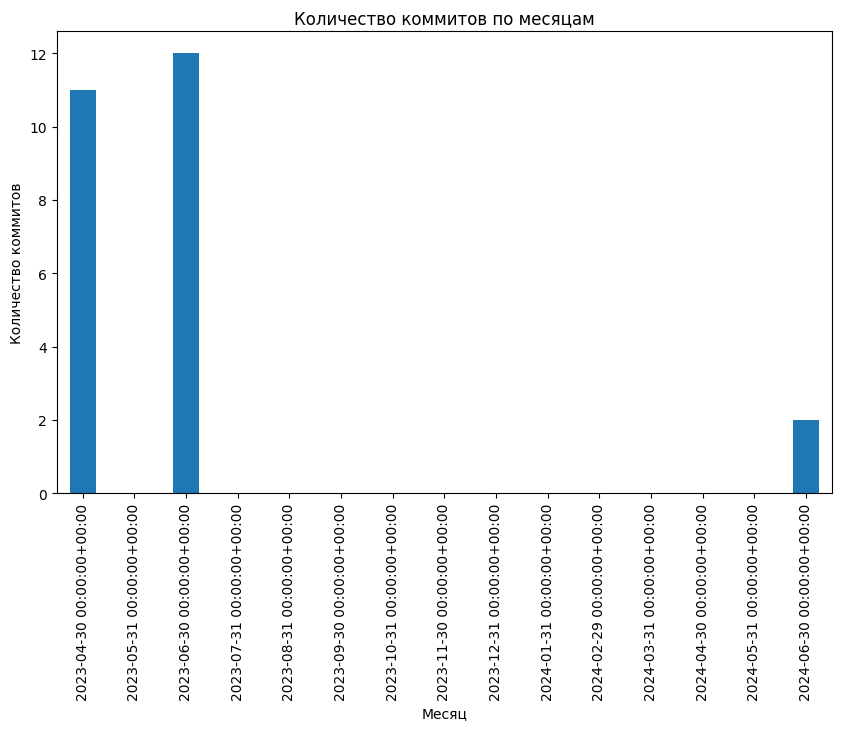

In [22]:
monthly_commits = df.resample('M').count()['message']

plt.figure(figsize=(10, 6))
monthly_commits.plot(kind='bar')
plt.title('Количество коммитов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество коммитов')
plt.show()
monthly_commits = df.resample('M').count()['message']

Анализ длины сообщений коммитов

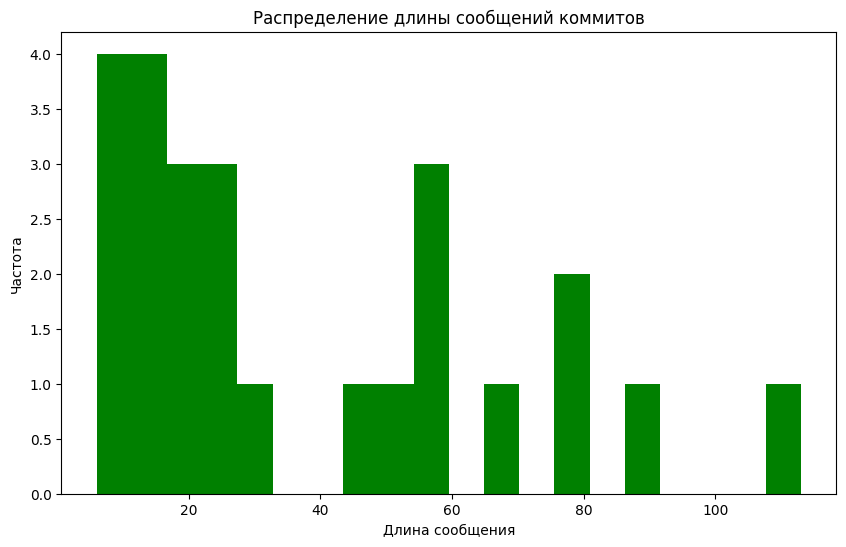

In [16]:
df['message_length'] = df['message'].apply(len)

plt.figure(figsize=(10, 5))
df['message_length'].plot(kind='hist', bins=20, color='green')
plt.title('Распределение длины сообщений коммитов')
plt.xlabel('Длина сообщения')
plt.ylabel('Частота')
plt.show()

Анализ активности по дням недели

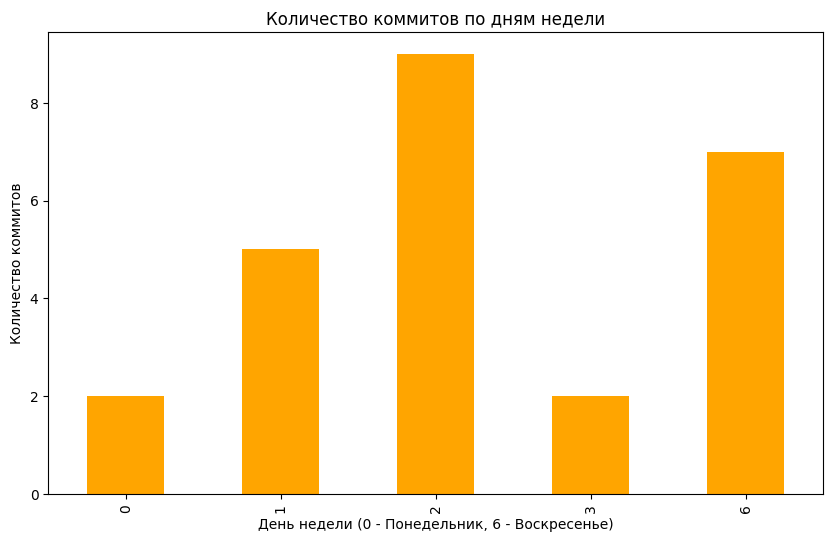

In [17]:
df['weekday'] = df.index.weekday

weekday_commits = df.groupby('weekday').count()['message']

plt.figure(figsize=(10, 6))
weekday_commits.plot(kind='bar', color='orange')
plt.title('Количество коммитов по дням недели')
plt.xlabel('День недели (0 - Понедельник, 6 - Воскресенье)')
plt.ylabel('Количество коммитов')
plt.show()